In [92]:
import numpy as np
from scipy import fft
import  matplotlib.pyplot as plt 
#comment out this line if you worship the light-side
plt.style.use(['dark_background'])

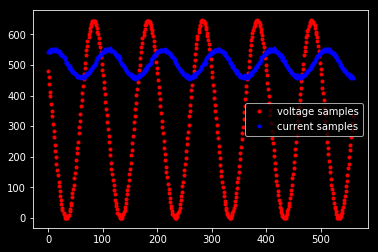

In [93]:
# data is CSV: index, Voltage Input, Current Output,
X_micros, V, I = np.loadtxt("out.csv",delimiter=",").transpose()
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.plot(X_micros,V,'r.',label='voltage samples')
ax.plot(X_micros,I,'b.',label='current samples')
ax.legend()

Timestamps `X_micros` for this dataset should be floating point micros, but were accidently truncated, we can estimate the sampe_rate from:

In [94]:
timestep = 1e-6*X_micros[-1]/len(X_micros)
sample_rate = 1.0/timestep
print(f"timestep={timestep}")
print(f"sample_rate={sample_rate}")

timestep=1.118e-06
sample_rate=894454.3828264759


Now we perform Fourier analysis to compute $\mathbf{Z} = FFT(V)/FFT(I)$

In [95]:
N = 2**14 #number of FFT bins to use, sample is zero-padded
FV = np.fft.fft(V-V.mean(),n=N)  #we remove the DC bias
FI = np.fft.fft(I-I.mean(),n=N)
Z = FV/FI # the impedance, which is complex valued!
phi = 180*np.angle(Z)/np.pi
freq = np.fft.fftfreq(N, d=timestep)

Here we plot the positive frequencies stored in the first half of `N` bins using the low-level fft function which is not so user-friendly.  We choose an FFT size `N` significantly larger than our sample size to better show fundamental and side lobe frequencies . We see `sinc` like peaks at 10kHz in our signals, so this indicates artifacts from short-time sampling.  Curiously the impedance is rather flat around the fundamental, but that makes sense since the two peak have similar freq dependencies.  Does it reflect acurate estimates at 10kHz?  We'd have to scale the signals to their physical units.  The phase seems reasonable, but slightly overestimated. (We'd expect $90^{\circ}$ for a pure capacitance, but maybe this reflects non-ideal behavior or possibly measurement error?)

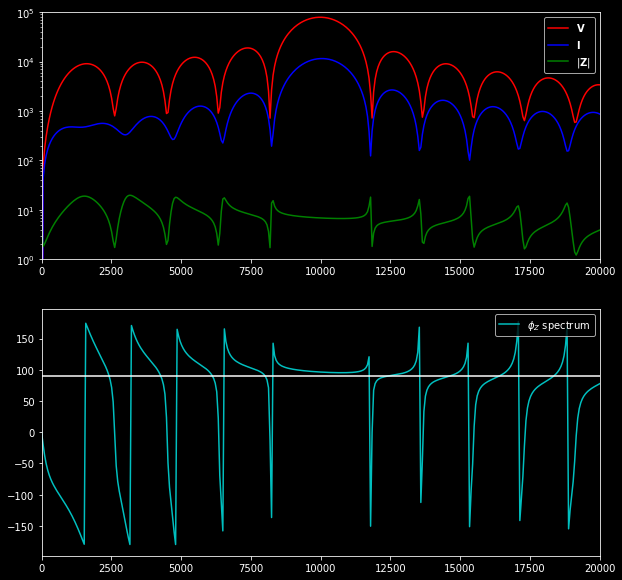

In [96]:
XLIM = (0.0,20e3)

fig2 = plt.figure(figsize=(10,10))
ax1 = fig2.add_subplot(211)
ax1.plot(freq[:N//2],abs(FV[:N//2]),'r-',label='$\mathbf{V}$')
ax1.plot(freq[:N//2],abs(FI[:N//2]),'b-',label='$\mathbf{I}$')
ax1.plot(freq[:N//2],abs(Z[:N//2]),'g-',label='$|\mathbf{Z}|$')

ax1.set_yscale('log')
ax1.set_xlim(*XLIM)
ax1.set_ylim(1,1e5)
ax1.legend(loc='upper right')

ax2 = fig2.add_subplot(212)
ax2.plot(freq[:N//2],phi[:N//2],'c-',label='$\phi_Z$ spectrum')
ax2.axhline(y=90)
ax2.set_xlim(*XLIM)
ax2.legend(loc='upper right')


